# Predicting Sedentary Lifestyle During

## Importing packages

In [1]:
#install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','data_cleaning.R'))
source(here('Modules','unsupervised_learning.R'))
#install_all_packages()
load_library_packages()

Warning message:
"package 'here' was built under R version 4.1.1"
here() starts at C:/Users/maria/Desktop/Programacao/IC/projetos/Barreiras-e-Facilitadores

Warning message:
"package 'ggplot2' was built under R version 4.1.1"
Warning message:
"package 'cowplot' was built under R version 4.1.1"
Warning message:
"package 'randomForest' was built under R version 4.1.1"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Warning message:
"package 'caret' was built under R version 4.1.1"
Carregando pacotes exigidos: lattice

Warning message:
"package 'lattice' was built under R version 4.1.1"
Warning message:
"package 'rpart.plot' was built under R version 4.1.1"
Carregando pacotes exigidos: rpart

Warning message:
"package 'readxl' was built under R version 4.1.2"
Warning message:
"package 'e1071' was built under R version 4.1.1"
Warning message:
"package 'Augmen

Performing PCA
Read the 1242 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 100.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 1.28 seconds (sparsity = 0.326346)!
Learning embedding...
Iteration 50: error is 57.596822 (50 iterations in 0.60 seconds)
Iteration 100: error is 57.596822 (50 iterations in 0.51 seconds)
Iteration 150: error is 57.596822 (50 iterations in 0.80 seconds)
Iteration 200: error is 57.596822 (50 iterations in 0.94 seconds)
Iteration 250: error is 57.596830 (50 iterations in 1.12 seconds)
Iteration 300: error is 2.314829 (50 iterations in 1.05 seconds)
Iteration 350: error is 1.308008 (50 iterations in 0.46 seconds)
Iteration 400: error is 1.263160 (50 iterations in 0.33 seconds)
Iteration 450: error is 1.258562 (50 iterations in 0.43 seconds)
Iteration 500: error is 1.254343 (50 iterations in 0.42 seconds)
Iteration 550: error is 1.251567 (50 iterations in 0.35 seconds)
Iteration 6

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

[[29]]
[1] TRUE

[[30]]
[1] TRUE

[[31]]
[1] TRUE

## Outliers

### Outlier: Strange Dont Practice

In [2]:
sedentery_dataset_copy <- sedentary_dataset
sedentery_dataset_copy["outlier"] <- strange_dp
outliers_result <- outliers_checker(distances_sdp, sedentery_dataset_copy, "sedentary_time_range_during")

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting leve

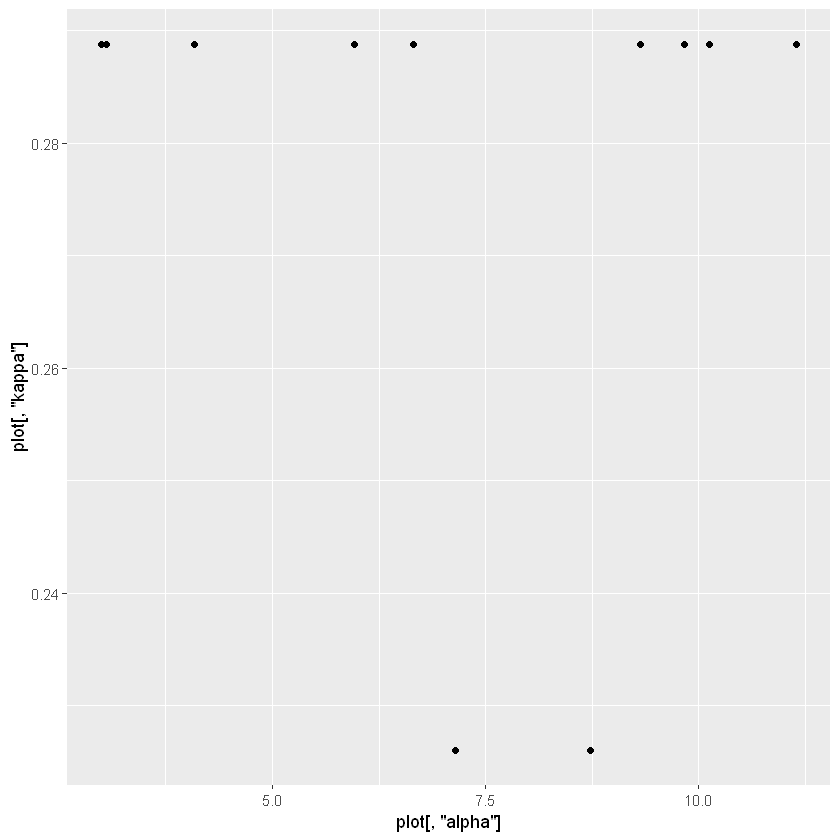

In [3]:
plot <- outliers_result$kappa_x_alpha

ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

### Outlier: Strange Practice

In [4]:
sedentary_dataset_copy <- sedentary_dataset
sedentary_dataset_copy["outlier"] <- strange_p
outliers_result <- outliers_checker(distances_sp, sedentary_dataset_copy, "sedentary_time_range_during")

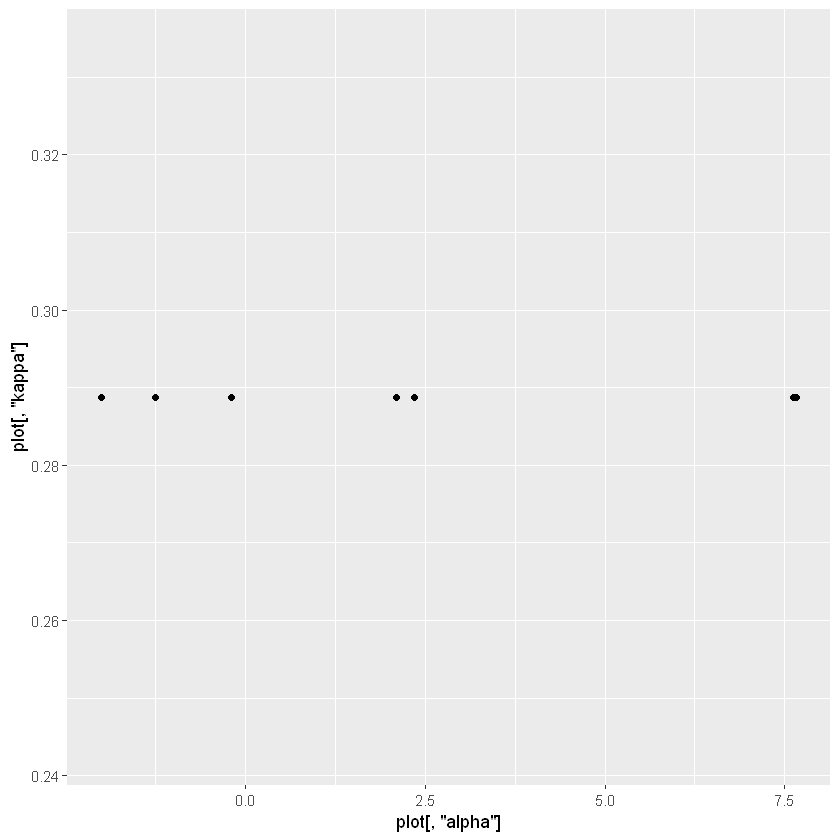

In [5]:
plot <- outliers_result$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

### New Train and Test

In [3]:
sedentary_train <- outliers_result$best_model$train
sedentary_test <- outliers_result$best_model$test

## Models

In [2]:
table(sedentary_dataset[, "sedentary_time_range_during"])


less_then_8_hours   more_or_8_hours 
              805               437 

### Applying augmentation into the training set

In [8]:
set.seed(2)
sedentary_train.aug <- data_augmentation(
    train_data=sedentary_train,
    yname="sedentary_time_range_during",
    maj_class = "less_then_8_hours",
    min_classes = c("more_or_8_hours"),
    ycol=match("sedentary_time_range_during",names(sedentary_dataset))
)

table(sedentary_train.aug[, "sedentary_time_range_during"])



less_then_8_hours   more_or_8_hours 
              564               564 

### Decision Tree: Kappa metric without augmentation

Confusion Matrix and Statistics

                   Reference
Prediction          less_then_8_hours more_or_8_hours
  less_then_8_hours               223              88
  more_or_8_hours                  18              43
                                           
               Accuracy : 0.7151           
                 95% CI : (0.6663, 0.7604) 
    No Information Rate : 0.6478           
    P-Value [Acc > NIR] : 0.003495         
                                           
                  Kappa : 0.2888           
                                           
 Mcnemar's Test P-Value : 2.058e-11        
                                           
            Sensitivity : 0.9253           
            Specificity : 0.3282           
         Pos Pred Value : 0.7170           
         Neg Pred Value : 0.7049           
              Precision : 0.7170           
                 Recall : 0.9253           
                     F1 : 0.8080           
             Prevalence : 0.

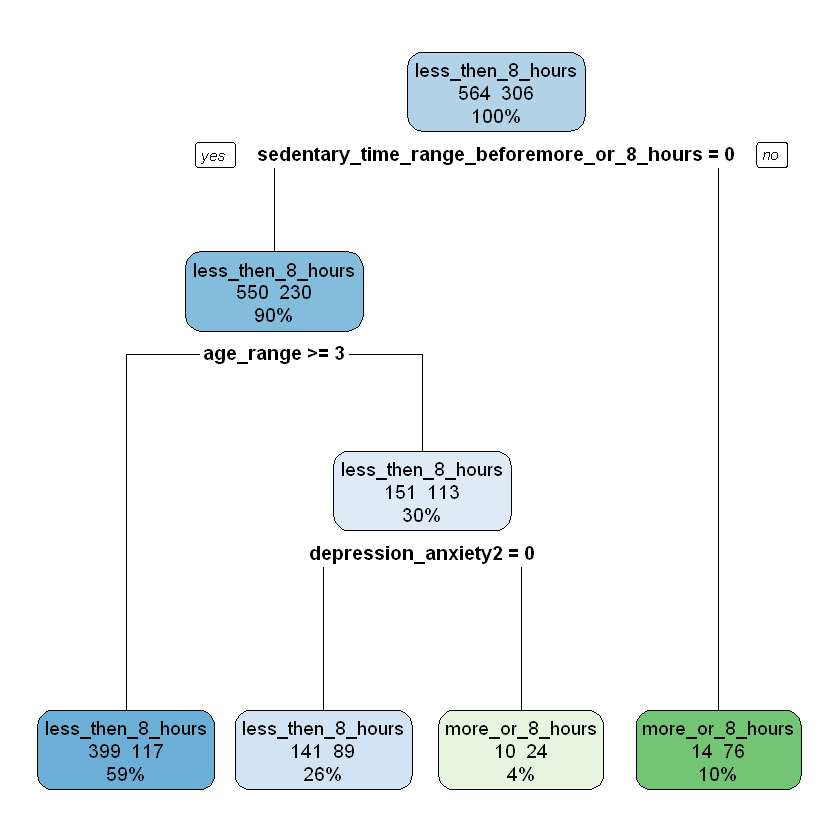

In [9]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = sedentary_train,
    test_data=sedentary_test,
    yname="sedentary_time_range_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel, extra=101)



### Decision Tree: Kappa metric with augmentation

Confusion Matrix and Statistics

                   Reference
Prediction          less_then_8_hours more_or_8_hours
  less_then_8_hours               230             100
  more_or_8_hours                  11              31
                                           
               Accuracy : 0.7016           
                 95% CI : (0.6523, 0.7477) 
    No Information Rate : 0.6478           
    P-Value [Acc > NIR] : 0.01627          
                                           
                  Kappa : 0.226            
                                           
 Mcnemar's Test P-Value : < 2e-16          
                                           
            Sensitivity : 0.9544           
            Specificity : 0.2366           
         Pos Pred Value : 0.6970           
         Neg Pred Value : 0.7381           
              Precision : 0.6970           
                 Recall : 0.9544           
                     F1 : 0.8056           
             Prevalence : 0.

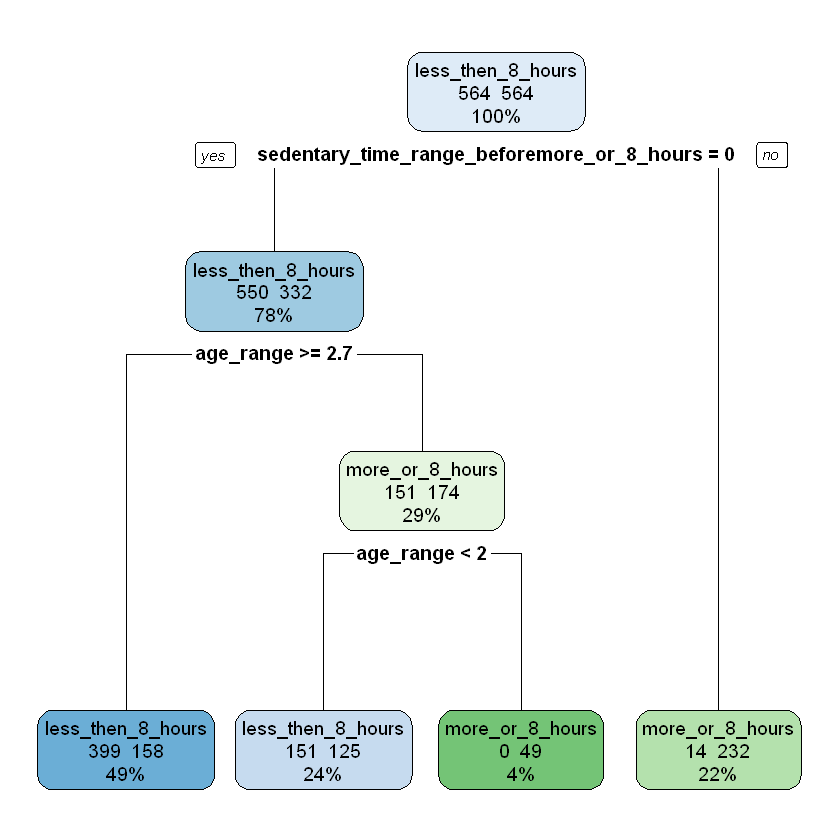

In [10]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = sedentary_train.aug,
    test_data=sedentary_test,
    yname="sedentary_time_range_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel, extra=101)



### RF: Kappa metric without augmentation

In [11]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = sedentary_train,
    test_data=sedentary_test,
    yname="sedentary_time_range_during",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

                   Reference
Prediction          less_then_8_hours more_or_8_hours
  less_then_8_hours               218              68
  more_or_8_hours                  23              63
                                           
               Accuracy : 0.7554           
                 95% CI : (0.7084, 0.7982) 
    No Information Rate : 0.6478           
    P-Value [Acc > NIR] : 5.251e-06        
                                           
                  Kappa : 0.4183           
                                           
 Mcnemar's Test P-Value : 3.979e-06        
                                           
            Sensitivity : 0.9046           
            Specificity : 0.4809           
         Pos Pred Value : 0.7622           
         Neg Pred Value : 0.7326           
              Precision : 0.7622           
                 Recall : 0.9046           
                     F1 : 0.8273           
             Prevalence : 0.

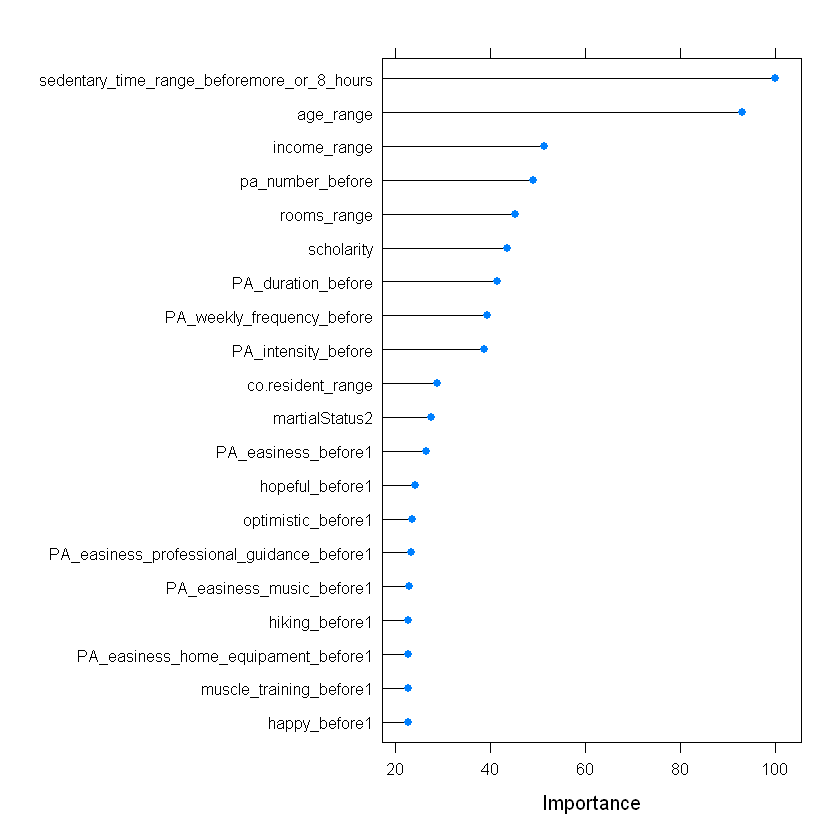

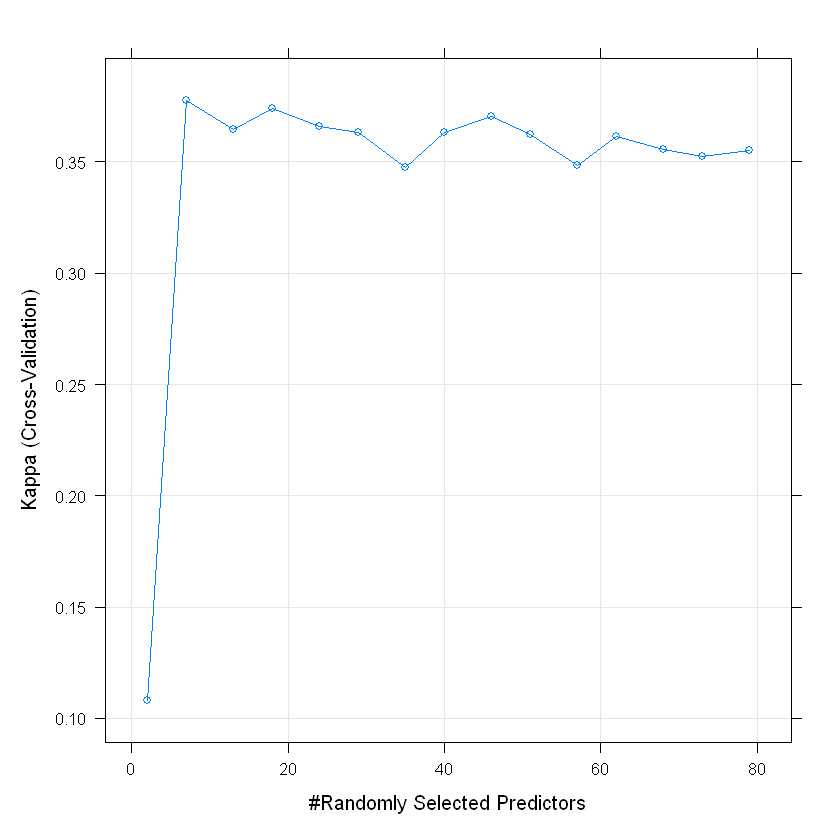

In [12]:
plot(varImp(model$result), top=20)
plot(model$result)


### RF: Kappa metric with augmentation

In [13]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = sedentary_train.aug,
    test_data=sedentary_test,
    yname="sedentary_time_range_during",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

                   Reference
Prediction          less_then_8_hours more_or_8_hours
  less_then_8_hours               206              63
  more_or_8_hours                  35              68
                                           
               Accuracy : 0.7366           
                 95% CI : (0.6887, 0.7806) 
    No Information Rate : 0.6478           
    P-Value [Acc > NIR] : 0.0001574        
                                           
                  Kappa : 0.393            
                                           
 Mcnemar's Test P-Value : 0.0063833        
                                           
            Sensitivity : 0.8548           
            Specificity : 0.5191           
         Pos Pred Value : 0.7658           
         Neg Pred Value : 0.6602           
              Precision : 0.7658           
                 Recall : 0.8548           
                     F1 : 0.8078           
             Prevalence : 0.

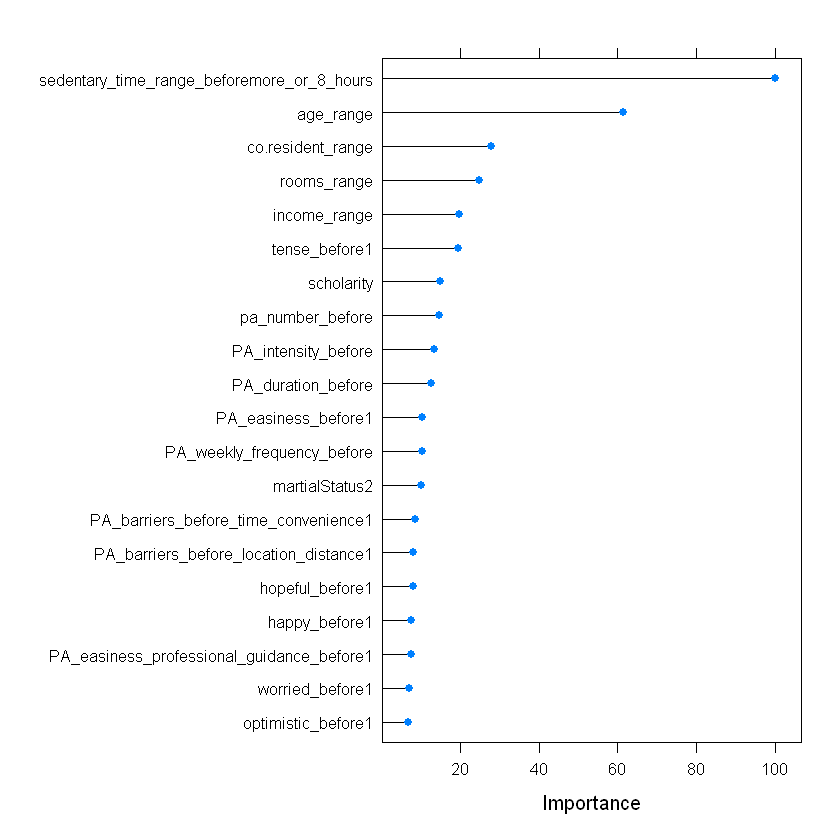

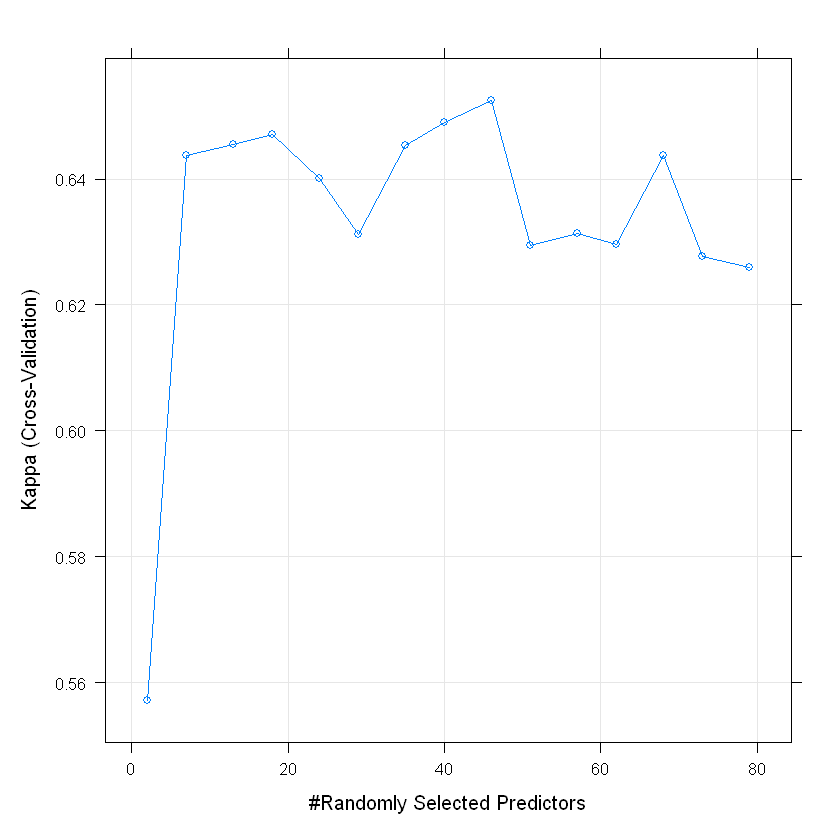

In [14]:
plot(varImp(model$result), top=20)
plot(model$result)


## Sensibility and Specificity Analysis

### Vectorized Metrics

In [6]:
f1 <- function(ths){
    
  diff <- abs(ths$Sensitivity - ths$Specificity)
  indexOfMin = match(min(diff), diff)
  return(ths[indexOfMin, "prob_threshold"])
}

f2 <- function(ths){
    desv <- function(x){
      sd(c(unname(x["Sensitivity"]), unname(x["Specificity"])))
    }
    avg <- (ths$Sensitivity + ths$Specificity)/2
    deviation <- apply(ths, desv, MARGIN=1)
    metric <- avg - deviation
    indexOfMin = match(max(metric), metric)
    return(ths[indexOfMin, "prob_threshold"])
}

In [28]:
Sensitivities <- c()
Specificities <- c()
Metric <- c()
sensitivity_specificity_balanced <- function(data, lev=NULL, model = NULL){ 
    Sensitivity <- caret::sensitivity(data$pred, data$obs)
    Sensitivities <<- append(Sensitivities, Sensitivity)
    Specificity <- caret::specificity(data$pred, data$obs)
    Specificities <<- append(Specificities, Specificity)
    balanced <- (Sensitivity + Specificity)/2 - sd(c(Sensitivity, Specificity))
    Metric <<- append(Metric, balanced)
    names(balanced) <- "Bal" 
    balanced
}
set.seed(2)
model <- fit_model(

    model_method="rpart",
    model_metric="Bal",
    trControl_func = trainControl(method = "cv",number=12, summaryFunction = sensitivity_specificity_balanced),
    train_data = sedentary_train,
    test_data=sedentary_test,
    yname="sedentary_time_range_during",
    tunegrid=expand.grid(cp=c(0.1))
)
save(model, file="save_model.RData")
    print(Sensitivities)
print(model$result)
print(model$matrix)
#results <- data.frame(mtrys, Sensitivities, Specificities)

# p = ggplot() + 
#     geom_line(data = results, aes(x = mtrys,  y = Sensitivities, colour = "Sensitivity"), size=1) +
#     geom_line(data = results, aes(x = mtrys, y = Specificities, colour = "Specificity"), size=1) +
#     scale_color_manual(name = "Metric", values = c("Sensitivity" = "darkblue", "Specificity" = "red")) + 
#     xlab('probability threshold') +
#     ylab('Sensitivity and Specificity')
# p 



Setting levels: control = 1, case = 2

Setting direction: controls < cases



 [1] 0.4000000 0.9574468 0.9574468 1.0000000 0.9361702 1.0000000 0.9787234
 [8] 1.0000000 0.9787234 1.0000000 0.9361702 0.9787234 0.9787234
CART 

870 samples
 73 predictor
  2 classes: 'less_then_8_hours', 'more_or_8_hours' 

No pre-processing
Resampling: Cross-Validated (12 fold) 
Summary of sample sizes: 797, 798, 798, 797, 798, 797, ... 
Resampling results:

  Bal       
  0.09872756

Tuning parameter 'cp' was held constant at a value of 0.1
Confusion Matrix and Statistics

                   Reference
Prediction          less_then_8_hours more_or_8_hours
  less_then_8_hours               230             100
  more_or_8_hours                  11              31
                                           
               Accuracy : 0.7016           
                 95% CI : (0.6523, 0.7477) 
    No Information Rate : 0.6478           
    P-Value [Acc > NIR] : 0.01627          
                                           
                  Kappa : 0.226            
                  

### Metric 1: 

 $$ \frac{(S+E)}{2} - \sigma(S, E)$$

In [20]:
dim(sedentary_train)

[1] 870  74

#### Change Model Metric

In [47]:
# Sensitivities <- c()
# Specificities <- c()
# Metric <- c()
sensitivity_specificity_balanced <- function(data, lev=NULL, model = NULL){ 
    Sensitivity <- caret::sensitivity(data$pred, data$obs)
    # Sensitivities <<- append(Sensitivities, Sensitivity)
    Specificity <- caret::specificity(data$pred, data$obs)
    # Specificities <<- append(Specificities, Specificity)
    balanced <- (Sensitivity + Specificity)/2 - sd(c(Sensitivity, Specificity))
    # Metric <<- append(Metric, balanced)
    names(balanced) <- "Bal" 
    balanced
}
set.seed(2)
model <- fit_model(

    model_method="rf",
    model_metric="Bal",
    trControl_func = trainControl(method = "cv", search="grid",  summaryFunction = sensitivity_specificity_balanced),
    train_data = sedentary_train,
    test_data=sedentary_test,
    yname="sedentary_time_range_during",
    length=15
)

print(model$matrix)
#results <- data.frame(mtrys, Sensitivities, Specificities)

# p = ggplot() + 
#     geom_line(data = results, aes(x = mtrys,  y = Sensitivities, colour = "Sensitivity"), size=1) +
#     geom_line(data = results, aes(x = mtrys, y = Specificities, colour = "Specificity"), size=1) +
#     scale_color_manual(name = "Metric", values = c("Sensitivity" = "darkblue", "Specificity" = "red")) + 
#     xlab('probability threshold') +
#     ylab('Sensitivity and Specificity')
# p 



Setting levels: control = 1, case = 2

Setting direction: controls < cases



Confusion Matrix and Statistics

                   Reference
Prediction          less_then_8_hours more_or_8_hours
  less_then_8_hours               212              66
  more_or_8_hours                  29              65
                                           
               Accuracy : 0.7446           
                 95% CI : (0.6971, 0.7882) 
    No Information Rate : 0.6478           
    P-Value [Acc > NIR] : 3.976e-05        
                                           
                  Kappa : 0.4017           
                                           
 Mcnemar's Test P-Value : 0.0002212        
                                           
            Sensitivity : 0.8797           
            Specificity : 0.4962           
         Pos Pred Value : 0.7626           
         Neg Pred Value : 0.6915           
              Precision : 0.7626           
                 Recall : 0.8797           
                     F1 : 0.8170           
             Prevalence : 0.

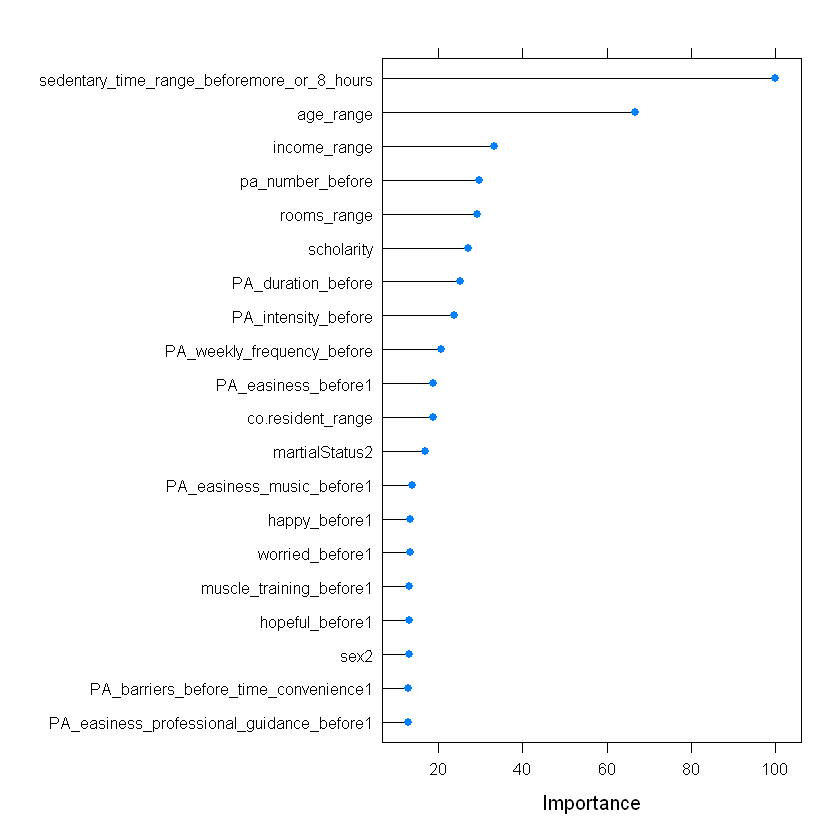

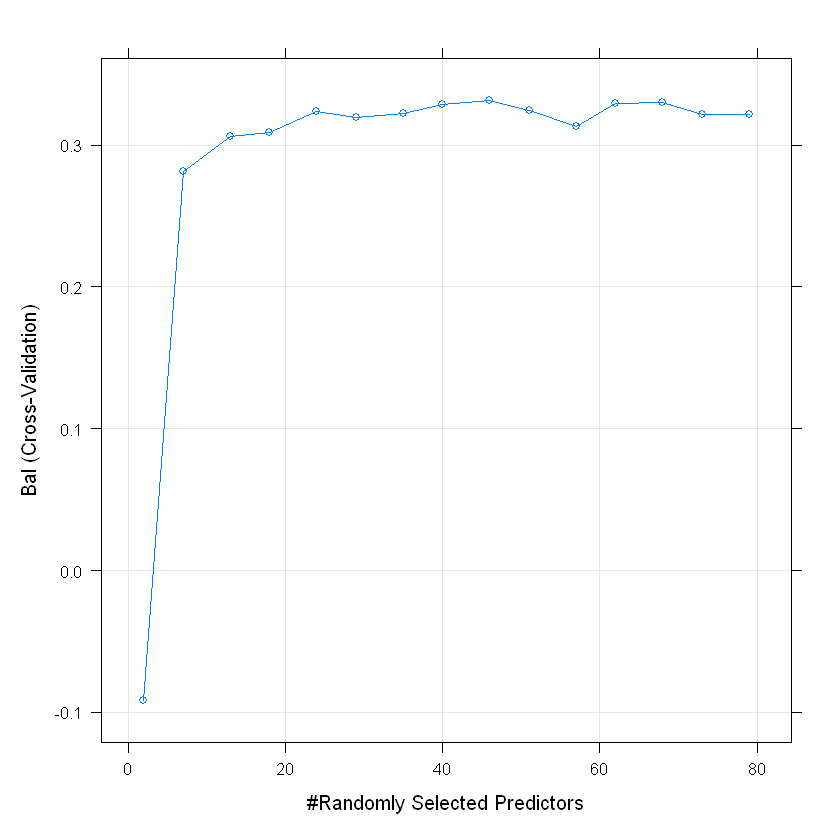

In [ ]:
plot(varImp(model$result), top=20)
plot(model$result)

#### Find Optimal threshhold

Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA

[1] 0.66
Confusion Matrix and Statistics

                   Reference
Prediction          less_then_8_hours more_or_8_hours
  less_then_8_hours               160              29
  more_or_8_hours                  81             102
                                           
               Accuracy : 0.7043           
                 95% CI : (0.6551, 0.7502) 
    No Information Rate : 0.6478           
    P-Value [Acc > NIR] : 0.01225          
                                           
                  Kappa : 0.4058           
                                           
 Mcnemar's Test P-Value : 1.158e-06        
                                           
            Sensitivity : 0.6639           
            Specificity : 0.7786           
         Pos Pred Value : 0.8466           
         Neg Pred Value : 0.5574           
              Precision : 0.8466           
                 Recall : 0.6639           
                     F1 : 0.7442           
             Preval

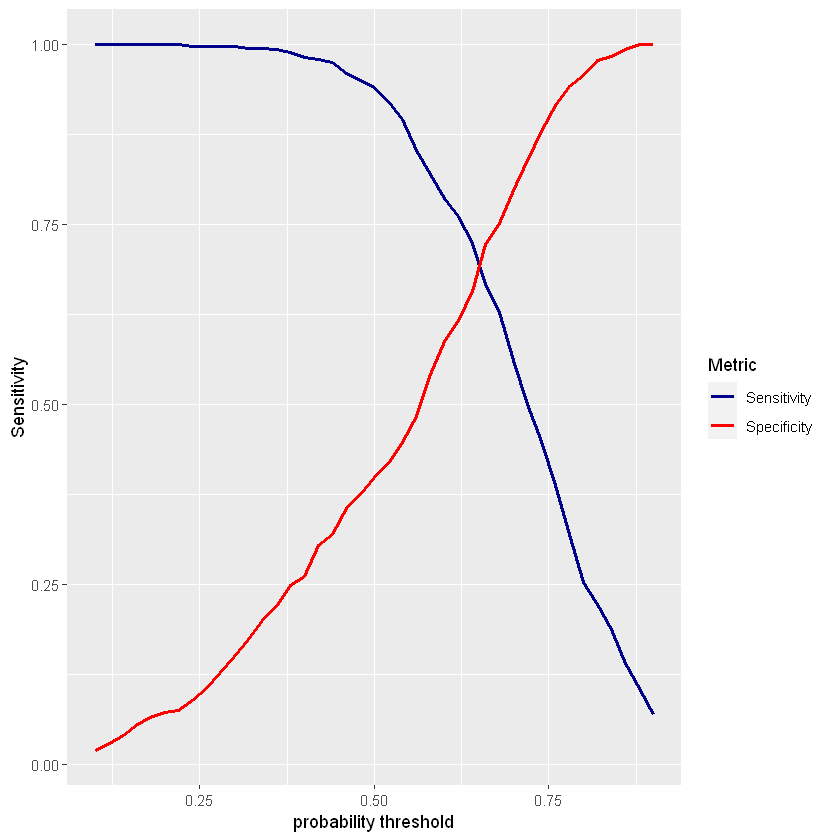

In [8]:
source(here('Modules','modules.R'))
set.seed(2)
model <- fit_model_thresholder(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid",  classProbs=TRUE, savePredictions=TRUE),
    train_data = sedentary_train,
    test_data=sedentary_test,
    yname="sedentary_time_range_during",
    length = 15,
    best_th = f2
)

print(model$matrix)

### Metric 2: abs(S - E)


#### Find Optimal threshold

Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA

[1] 0.66
Confusion Matrix and Statistics

                   Reference
Prediction          less_then_8_hours more_or_8_hours
  less_then_8_hours               160              29
  more_or_8_hours                  81             102
                                           
               Accuracy : 0.7043           
                 95% CI : (0.6551, 0.7502) 
    No Information Rate : 0.6478           
    P-Value [Acc > NIR] : 0.01225          
                                           
                  Kappa : 0.4058           
                                           
 Mcnemar's Test P-Value : 1.158e-06        
                                           
            Sensitivity : 0.6639           
            Specificity : 0.7786           
         Pos Pred Value : 0.8466           
         Neg Pred Value : 0.5574           
              Precision : 0.8466           
                 Recall : 0.6639           
                     F1 : 0.7442           
             Preval

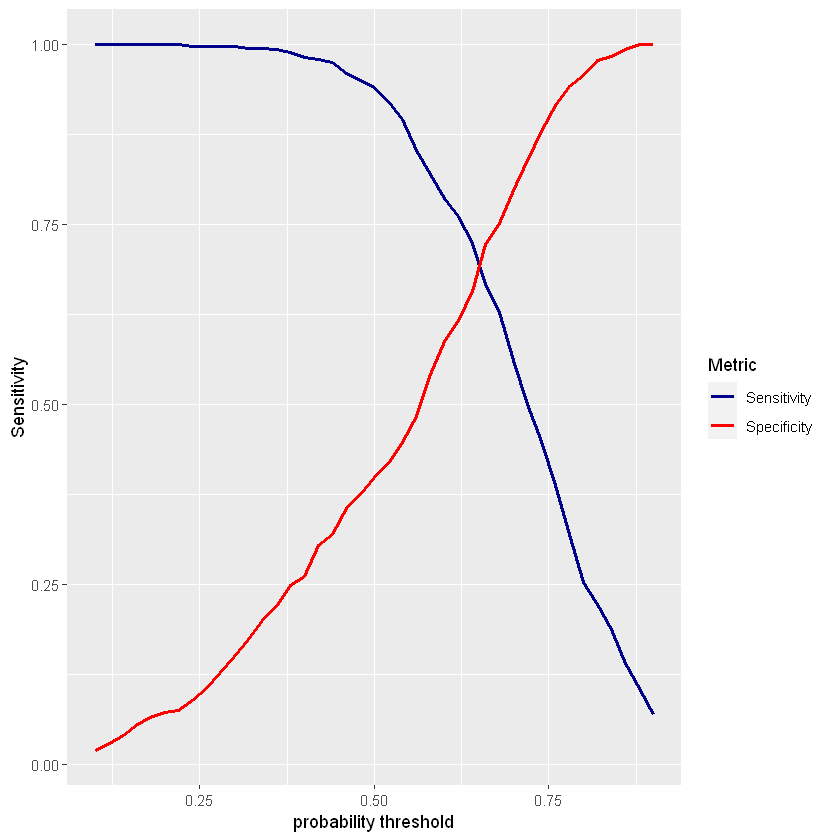

In [11]:
set.seed(2)
model <- fit_model_thresholder(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid", classProbs=TRUE, savePredictions=TRUE),
    train_data = sedentary_train,
    test_data=sedentary_test,
    yname="sedentary_time_range_during",
    length = 15,
    best_th= f1
)

print(model$matrix)